In [1]:
import nltk

In [2]:
#nltk.download_shell() bunu ilk seferde çalıştırdık ve dataseti indirdik. sonrakilerde gerek yok
# Tüm paketleri görmek için l (l HARFİNE) e bas
# stopwords paketini indireceğiz. O yüzden önce download için d ye sonra paketin adını yazıyoruz.
#indireceğimiz paketin adını yazdıktan sonra paket inecek. indikten sonra qya basıp çıkmamız lazım yoksa çalışmaya devam eder

In [3]:
# UCI dataseti kullanılacak. Bu sitede birçok ml dataseti mevcut. linki konuyu anlattığı notebookunda var.
# Biz SMS spamı yapacağız.
#list compherension yapıyoruz.
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]): #ilk 10 mesajı numaralandırıyoruz
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0]
#Verinin 1. sütunu etiketini 2. sütununun da mesajın kendisini gösterdiğini görebiliyoruz.
#Buradan da yukarıdaki sonuçtanda görüleceği üzere bu dosya tab seperated file yani tsv. Bunu okurken de buna göre okuyup df yapabaliriz

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
#şimdi read_csv diyerek içerisinde sep argümanını kullanacağız
messages = pd.read_csv("smsspamcollection\SMSSpamCollection",sep="\t",names=["label","message"] )

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe() #5572 mesaj var ama unique olarak 5169 mesaj var. bu da demek oluyor ki tekrar eden mesajlar var

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby("label").describe() #labellara göre gruplayıp inceliyoruz

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages["lenght"]=messages["message"].apply(len) #mesajların uzunluklarını sütun olarak ekledik.

In [14]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

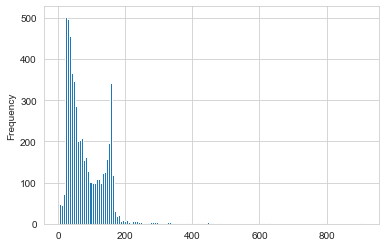

In [16]:
messages["lenght"].plot.hist(bins=150) #mesaj uzunluklarını plotluyoruz
# x axisin 100e kadar gitmesinin sebebi çok uzun mesajların olmasındandır.
# bin ile oynar ve 150 falan yaparsak daha ayrıntılı görürüz.

In [17]:
messages["lenght"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [18]:
messages["lenght"].max()

910

In [19]:
messages[messages["lenght"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Buradan anlayacağımız şu ki lenght, mesajın ham mi spam mi olduğunu ayırt edici bir özelliktir.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7E8588>,
      dtype=object)

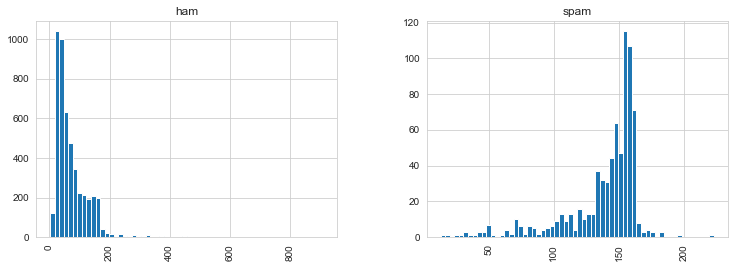

In [20]:
#pandasın kendi facet grid görünümünü kullanalım
messages.hist(column="lenght",by="label",bins=60,figsize=(12,4))

Grafikten de görüleceği üzere spam mesajlar daha fazla karakter içeriyor yaklaşık 150 civarında bir yığılma var. ama ham mesajlarda yaklaşık 50 civarında karakter kullanılmış. Bu da demek oluyor ki mesaj uzunluğu ayırt edici özellik olarak kullanılabilir.

Mesaj textlerini şimdi rakamlarla vektörlere dönüştürüyoruz.Çünkü şimdiye kadar öğrendiğimiz classification modellerimiz hep rakamlarla çalışıyor.
Bunu yaparken ilk olarak her mesajı kendi içindeki kelimelere ayıran bir fonksiyon yazacağız
Sonra ortak kullanılan a,if gibi kelimeleri sileceğiz 
Aynı şekilde noktalamaları da sileceğiz.

In [21]:
import string

In [22]:
mess = "Sample message! Notice: it has punctuation."

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#Şimdi mess değerini noktalamalardan ayırarak sadece harflerine bölelim
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
# şimdi stopwordsü nasıl sileceğimize bakalım .Yani ayırt edici özelliği olmayan kelimeler ya da kalıplar
# Bunları, mesajın ham mi spam mi olduğunu ayırt ederken sileceğiz. Çünkü ayırt edici değiller.
from nltk.corpus import stopwords

In [27]:
stopwords.words("english") # bunların hepsi İngilizce stopwordstür yani ayırt edici özellik taşımayan kelimeler ya da kalıplardır.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
stopwords.words("turkish") #bunlar da Türkçe stopwords.

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [29]:
nopunc = "".join(nopunc) #nopunc içerisindeki elemanları birleştirerek tek bir eleman yaptık

In [30]:
nopunc

'Sample message Notice it has punctuation'

In [31]:
x=["a","b","c","d"]

In [32]:
"+++".join(x) #join listedeki elemanlar arasına konulmak istenen şeylerle birlikte hepsini bir araya getiriyor.

'a+++b+++c+++d'

In [33]:
nopunc.split() #şimdi stopwordleri silebileceğimiz bir listemiz oluştu.

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [34]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
#Burada clean_mess listesine nopunc listesindeki stopword olmayan kelimeleri atıyoruz

In [35]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [36]:
# şimdi bu 3 adımı yapan bir fonksiyon yazıyoruz

def text_process(mess):
    """
    1. remove puncuation
    2. remove stop words
    3. return list of clean text words
    
    """
    #1
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #2
    nopunc = "".join(nopunc)
    
    #3
    return [word for word in nopunc.split() if word.lower not in stopwords.words("english") ]


In [37]:
# şimdi veriyi tokenize edeceğiz. Yani bu yaptığımız işleme tabi tutarak stopwordsten arındıracağız
messages["message"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [38]:
messages["message"].head().apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

Burada nltk kütüphanesinin metin verilerini normalize etmek için olan birçok aracından en basit olanını gördük. Bunun farklı yolları da mevcuttur. Örneğin en yaygın olanı stemming (köklenme)dir. running, run, ran gibi kelimelerin hepsini run olarak dönüştürür. Bazı normalizasyon metodları (steming gibi) kısa gösterimler yüzünden (u, nah, vb.) sorun yaşar. O yüzden farklı yerde göstereceğiz stemmingi.

Şimdi kelimelere ayırdığımız bu mesajları (tokenları) ml algoritma modellerinin kullanabilmesi için vektörlere dönüştüreceğiz.

### Vectorization

Tokenları ml modellerinin anlayabileceği vektörlere dönüştüreceğiz. Bunu da **bag of words modeli** (bir dökümanın kelime sayımından oluşan vectörlerle ifade edilmesi modeli-örn;blue,red,house kelimeleri varsa red house = 0,1,1 dir blue house ise 1,0,1dir)  ile 3 adımda yapıyoruz.

1. Her kelimenin mesajda kaç kere geçtiğini buluyoruz. (frekans)
2. Bu sayıları tartıyoruz, böylece sık kullanılan tokenların ağırlığı daha az oluyor. (ters belge frekansı-inverse document frequency)
3. Vectorleri, orijinal text uzunluğundan soyutlamak için birim uzunluğa göre normalize ediyoruz (L2 norm)

Bunu yaparken 1. adımda SMS külliyatındaki her kelimeyi her ne kadar fazla boyutlu olursa olsun ayrı ayrı birer vektöre dönüştürmek için sckit learnün **CountVectorizer** özelliğini kullanacağız. Bu model text dokümanlarını token sayımından oluşan bir matrix haline getirecek. İşte bu model **bag of words modelidir.**

Bunun sonucunda her kelime ve her mesajdan oluşan dev bir matrix elde edilir. İçerisinde bol 0 bulunduğu için bu bir **Sparse Matrix** olur. Wikiden inceleyebilirsin bu kavramı. 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

Burada bow_transformer:bag of words transformer. analyzer parametresi içine bizim yazdığımız ve stopword leri metinden ayıklayan fonksiyonu verdik ve tüm mesaj metinlerini bu modele fit ettik. Sonuc olarak bize her mesaj ve her kelimeden oluşan bir matrix verdi.

In [41]:
print(len(bow_transformer.vocabulary_)) # sözlükteki toplam kelime sayısı 

11747


In [42]:
# şimdi bir tane mesajı bow_transformera vereceğiz ve vektör halini göreceğiz.
mess4=messages["message"][3] # 4 satırdaki mesajı inceleyelim 

In [43]:
print(mess4)

U dun say so early hor... U c already then say...


In [44]:
bow4=bow_transformer.transform([mess4]) # bir listenin elemanı olarak transforma veriyoruz mesajı

In [45]:
print(bow4) # vektöre dönüşmüş hali. 

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


Stop wordsleri sildikten sonra 9 tane tekil kelime olduğunu görüyoruz mesajda. Bazılarının 2 şer defa geçtiğini görüyoruz. Hangilerinin ikişer defa geçtiğini görelim.

In [46]:
print(bow4.shape) # 1e 11747 satırlık bir matrix oluştu.

(1, 11747)


In [47]:
bow_transformer.get_feature_names()[4221] # sözlükteki 4221. kelimenin hangisi olduğuna baktık

'U'

In [48]:
bow_transformer.get_feature_names()[9832]

'say'

U ve say kelimeleri ikişer defa geçiyormuş.

In [49]:
messages_bow = bow_transformer.transform(messages["message"]) # tüm mesajları matrise dönüştürüyoruz

In [50]:
print("SHAPE OF SPARSE MATRIX:",messages_bow.shape) 

SHAPE OF SPARSE MATRIX: (5572, 11747)


In [51]:
messages_bow.nnz # matriste 0 olmayan eleman sayısı

79463

In [52]:
# Matrisin sparsity (seyreklik) değerini bir formülle buluyoruz
# Yani 0 olmayan mesajların toplam mesaj sayısına oranı

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.12140229049026034


### TF/IDF
TF : Term Frequency: terimin dökümandaki tekrarı/önemi. Bir döküman içerisinde geçen terim ağırlıklarını hesaplamak için kullanılan yöntemdir.

IDF :Inverse Document Frequency: terimin külliyattaki tekrarı/önemi. Birden fazla dökümanda kelimenin geçme sayısını bularak onun bağlaç mı değil mi bunu anlamaya çalışır. Bir terim ne kadar az dökümanda geçiyorsa IDF o kadar fazla çıkar.

Konu anlatımının olduğu notebookun bu kısmını oku daha fazla açıklama var.

Bir terimin döküman içindeki önemini gösteren istatistiki yöntem ile hesaplanmış ağırlık faktörüdür.

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [55]:
tfidf4 = tfidf_transformer.transform(bow4) #4 numaralı mesajı örnek olarak görebilmek için demiyoruz

In [56]:
print(tfidf4) #4 numaralı mesajdaki kelimelerin idf-tf değerini yani ağırlığını / önemini görüyoruz.

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [57]:
#Şimdi sıradan bir kelimenin idf değerini buluyoruz.

tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

In [58]:
# Tüm bag of words külliyatını tf-idf değerleri olarak ifade edelim
# Böylece tüm kelimeleri sayısal olarak ifade etmiş oluruz.

messages_tfidf=tfidf_transformer.transform(messages_bow)

### NAIVE BAYES CLASSIFIER ALGORITHM
Spam mı ham mi onun ayırt edilebilmesine geçiyoruz. 
Bunun için bir çok kullanabileceğimiz sınıflandırma yöntemi var. Ancak birçok sebepten ötürü **NAIVE BAYES SINIFLANDIRMA ALGORİTMASINI** kullanmamız daha uygun olur.

In [59]:
from sklearn.naive_bayes import MultinomialNB #naive bayes modelini kuruyoruz

In [60]:
# mesajların ağırlığına göre label tahmini yapacak
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages["label"])

In [61]:
# Örnek mesaj üzerinden nasıl olduğuna bakıyoruz

spam_detect_model.predict(tfidf4)[0] #0. sütun spam mi ham mi olduğunu tahmin ediyor

'ham'

In [62]:
messages["label"][3] 
    
#mesajımızın gerçekten ne olduğuna baktık ve ham olduğunu gördük. tahmin doğru çıktı

'ham'

In [63]:
all_pred = spam_detect_model.predict(messages_tfidf) #tüm mesajlara uyguluyoruz

In [64]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [65]:
# Modelin başarısını anlayabilmek için veri setini train-test ayırmamız lazım

from sklearn.model_selection import train_test_split

In [66]:
msg_train,msg_test,label_train,label_test=train_test_split(messages["message"],messages["label"],test_size=0.3)

### PIPELINE
PİPELİNE : BU AŞAMAYA KADAR YAPILAN TÜM İŞLEMLERİ BORU HATTINA KOYARAK TEK BİR İŞLEMLE YAPMAMIZI SAĞLAR (TEXT SETLERLE İLGİLİ). HER VERİ SETİNDE BU İŞLEMLERİ TEKRAR ETMEK ZORUNDA KALMAYIZ BÖYLECE.PİPELİNE İÇERİSİNE STEPS ARGÜMANINI ALIR. STEPS, AŞAMALARIN TEKER TEKER  YAZDIĞI LİSTEDİR. YAPMAK İSTEDİĞİMİZ HERŞEYİ BİR LİSTE HALİNDE PİPELİNE İÇİNE KOYARIZ.

PİPELİNE İÇERİSİNDEKİ STEPS BİR LİSTEDİR. LİSTENİN ELEMANLARI DA TUPLELARDIR. BU TUPLELAR HER BİR AŞAMAYI GÖSTERİR. TUPLELARIN 1. ELEMANI AŞAMANIN ADI (NE YAZDIĞIN ÖNEMLİ DEĞİL ÇÜNKÜ STRİNG YAZIYORUZ), 2. ELEMANI DA YAPMAK İSTEDİĞİMİZ İŞLEMİN ADIDIR. İLLA BURADA YAPILAN MODELLERİ KULLANMAK ZORUNDA DEĞİLİZ. ÇOK FAZLA FARKLI MODELLER VAR. ÖRNEĞİN İLLA CLASSİFİER OLARAK MULTİNOMİAL YAZMAK ZORUNDA DEĞİLİZ. DİĞER CLASSİFİERLARI KULLANABİLİRİZ.

In [67]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier",MultinomialNB())

])

In [72]:
pipeline.fit(msg_train,label_train) #pipeline içine mesajımızı koyup bir pipe line objesi oluşturduk

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000000C0853A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [73]:
predictions = pipeline.predict(msg_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1457
        spam       1.00      0.58      0.73       215

    accuracy                           0.95      1672
   macro avg       0.97      0.79      0.85      1672
weighted avg       0.95      0.95      0.94      1672



Yaklaşık %97 civarında bir doğruluk oranı yakaladık. Şimdi multinomial yerine random forest classifier kullanalım.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
pipeline = Pipeline([
    
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier",RandomForestClassifier())

])

In [78]:
pipeline.fit(msg_train,label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000000C0853A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [79]:
predictions = pipeline.predict(msg_test)

In [80]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1457
        spam       1.00      0.67      0.80       215

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

